# Major Crime Indicators Analysis 
*This is a personal portfolio project by Thamilini P.*

This project focuses on major crime trends in Toronto. The Major Crime Indicators (MCI) are categorized under Assault, Break and Enter, Auto Theft, Robbery and Theft Over. According to the data description, one occurrence number may have more than one row to list all associated MCIs. 

### A breakdown of the 5 Phases of this project
* **[Ask Phase](#section-one)** : 
    - Define the problem
* **[Prepare Phase](#section-two)** : 
    - Make sure the data is credible and unbiased 
    - Organize data 
    - save datasets as R dataframes
* **[Process Phase](#section-three)** : 
    - Explore and clean data
    - Create and transform data
* **[Analyze Phase](#section-four)** :
    - Format and transform data
    - Identify patterns and draw conclusions
    - Make predictions and [recommendations](#section-five)
    - Make data-driven decisions
* **Share Phase (Completed using Tableau)** :
    - Understand visulization
    - Create effective visuals
    - Bring data to life
    - Use Data storytelling
    - Communicate to help others understand results



<a id="section-one"></a>
## Ask Phase

### Purpose/Objective

Analyze trends in Major Crime Indicator (MCI) data to help recommend crime reduction strategies.

<a id="section-two"></a>
## Prepare Phase

### Datasets License

The crime dataset used was made available by [Toronto Police Service Public Safety Data Portal](https://data.torontopolice.on.ca/datasets/TorontoPS::major-crime-indicators-1/about) under the [Open Government Licence - Ontario](https://www.ontario.ca/page/open-government-licence-ontario)

### Load R Packages

In [1]:
library(tidyverse) # metapackage of all tidyverse packages
library(skimr)
library(janitor)
library(lubridate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### Import datasets as dataframe

In [2]:
crime_data <- read_csv("/kaggle/input/major-crime-indicators-in-toronto/Major_Crime_Indicators.csv")

Rows: 301233 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (15): event_unique_id, Division, occurrencedate, reporteddate, location_...
dbl (16): X, Y, Index_, ucr_code, ucr_ext, reportedyear, reportedday, report...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Data Credibility/Bias

The Crime Data data set was downloaded directly from Toronto Police Service's Public Safety Data Portal and contains Major Crime Offences between 2014 and June 30, 2022 (Last Updated September 27, 2022). Therefore this is original data that is cited and current.

<a id="section-three"></a>
## Process Phase

Let's explore the structure of the dataset.

In [3]:
str(crime_data)

spec_tbl_df [301,233 × 31] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ X                  : num [1:301233] -8850398 -8818405 -8853791 -8832822 -8853452 ...
 $ Y                  : num [1:301233] 5429359 5436836 5402071 5419628 5410706 ...
 $ Index_             : num [1:301233] 201 202 203 204 205 206 207 208 209 210 ...
 $ event_unique_id    : chr [1:301233] "GO-20141273318" "GO-20141274349" "GO-20141274052" "GO-20141276966" ...
 $ Division           : chr [1:301233] "D31" "D42" "D22" "D53" ...
 $ occurrencedate     : chr [1:301233] "2014/01/03 05:00:00+00" "2014/01/03 05:00:00+00" "2014/01/03 05:00:00+00" "2014/01/03 05:00:00+00" ...
 $ reporteddate       : chr [1:301233] "2014/01/03 05:00:00+00" "2014/01/03 05:00:00+00" "2014/01/03 05:00:00+00" "2014/01/03 05:00:00+00" ...
 $ location_type      : chr [1:301233] "Apartment (Rooming House, Condo)" "Single Home, House (Attach Garage, Cottage, Mobile)" "Open Areas (Lakes, Parks, Rivers)" "Other Commercial / Corporate Places (For Profit, W

Below are column field descriptions provided by [Toronto Police Service Public Safety: OPEN DATA
DOCUMENTATION](https://torontops.maps.arcgis.com/sharing/rest/content/items/c0b17f1888544078bf650f3b8b04d35d/data):

* Index - Unique Identifier
* event_unique_id - Offence Number
* Division - Police Division where Offence Occurred
* occurrence_date - Date of Offence
* reporteddate - Date Offence was Reported
* location_type - Location Type of Offence
* premises_type - Premises Type of Offence
* ucr_code - UCR Code for Offence
* ucr_ext - UCR Extension for Offence
* Offence - Title of Offence
* reportedyear - Year Offence was Reported
* reportedmonth - Month Offence was Reported
* reportedday - Day of the Month Offence was Reported
* reporteddayofyear - Day of the Year Offence was Reported
* reporteddayofweek - Day of the Week Offence was Reported
* reportedhour - Hour Offence was Reported
* occurrenceyear - Year Offence Occurred
* occurrencemonth - Month Offence Occurred
* occurrenceday - Day of the Month Offence Occurred
* occurrencedayofyear - Day of the Year Offence Occurred
* occurrencedayofweek - Day of the Week Offence Occurred
* occurrencehour - Hour Offence Occurred
* MCI - MCI Category of Occurrence
* Hood_ID - Identifier of Neighbourhood
* Neighbourhood - Name of Neighbourhood
* Long - Longitude Coordinates (Offset to nearest intersection)
* Lat - Latitude Coordinates (Offset to nearest intersection)

Lets convert occurrencedate, reporteddate as POSIXct Datatype

In [4]:
crime_data$occurrencedate <- as.POSIXct(crime_data$occurrencedate)
crime_data$reporteddate <- as.POSIXct(crime_data$reporteddate)

We want the crime data from 2020 to June 30, 2022. Let's filter for data where the incident occurred on or after January 1, 2020

In [5]:
crime_data_2020_2022 <- crime_data %>% 
  filter(format(occurrencedate, format="%Y") >= 2020) %>% 
  arrange(occurrencedate)

Let's explore the structure of this dataframe using skim_without_charts(). This function will list column names, its datatype, number of missing values, and summary statistics.

In [6]:
skim_without_charts(crime_data_2020_2022)

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,event_unique_id,0,1,8,16,0,77037,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,Division,0,1,3,3,0,17,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,character,location_type,0,1,6,70,0,51,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,character,premises_type,0,1,5,11,0,7,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,character,offence,0,1,3,30,0,50,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,character,reportedmonth,0,1,3,9,0,12,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,character,reporteddayofweek,0,1,6,9,0,7,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,character,occurrencemonth,0,1,3,9,0,12,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
9,character,occurrencedayofweek,0,1,6,9,0,7,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


── Data Summary ────────────────────────
                           Values              
Name                       crime_data_2020_2022
Number of rows             87925               
Number of columns          31                  
_______________________                        
Column type frequency:                         
  character                13                  
  numeric                  16                  
  POSIXct                  2                   
________________________                       
Group variables            None                

── Variable type: character ────────────────────────────────────────────────────
   skim_variable       n_missing complete_rate min max empty n_unique whitespace
 1 event_unique_id             0             1   8  16     0    77037          0
 2 Division                    0             1   3   3     0       17          0
 3 location_type               0             1   6  70     0       51          0
 4 premises_type         

The dataset contains incidents from January 1, 2020 to June 30, 2022, so it is current and relevant. All column variables have zero missing values. 

Let's check for Duplicate Rows

In [7]:
janitor::get_dupes(crime_data_2020_2022)

No variable names specified - using all columns.


No duplicate combinations found of: X, Y, Index_, event_unique_id, Division, occurrencedate, reporteddate, location_type, premises_type, ... and 22 other variables

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


X,Y,Index_,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,ucr_code,⋯,occurrencedayofweek,occurrencehour,cleared,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude,ObjectId,dupe_count
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<dbl>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>


The data consists of Major Crime Indicators (MCI) by reporteddate and offense. The mci_category include 5 unique values which are:

In [8]:
unique(crime_data_2020_2022$mci_category)

[1] "Assault"         "Break and Enter" "Robbery"         "Auto Theft"     
[5] "Theft Over"

Lets separate the occurrence and reported date from the time.

In [9]:
crime_data_2020_2022$occurrencedatetime <- crime_data_2020_2022$occurrencedate
crime_data_2020_2022$reporteddatetime <- crime_data_2020_2022$reporteddate
crime_data_2020_2022$occurrencedate <- as.Date.POSIXct(crime_data_2020_2022$occurrencedate)
crime_data_2020_2022$reporteddate <- as.Date.POSIXct(crime_data_2020_2022$reporteddate)

### Number of Unique Occurences

Some occurrences may have more than one MCI. Therefore this dataset contains multiple rows to assign more than one MCI to that occurrence. 

Therefore let's determine the number of unique occurrences.

In [10]:
num_of_occurrences <- nrow(distinct(crime_data_2020_2022,event_unique_id))
num_of_occurrences

[1] 77037

i.e. The dataset contains 87925 rows of data but only 77037 unique occurrences.

<a id="section-four"></a>
## Analyze Phase



### Time Difference between Reported Datetime and Occurence Datetime

Let's determine the time difference between occurrence datetime and reported datetime.

In [11]:
delay_in_reporting <- crime_data_2020_2022 %>% 
  summarise(reported_delay_hours = difftime(reporteddatetime,occurrencedatetime,units = "hours"), reported_delay_days = difftime(reporteddatetime,occurrencedatetime,units = "days"))

head(delay_in_reporting)

reported_delay_hours,reported_delay_days
<drtn>,<drtn>
0 hours,0 days
0 hours,0 days
0 hours,0 days
0 hours,0 days
0 hours,0 days
48 hours,2 days


Let's add these columns to our crime dataframe.

In [12]:
crime_data_2020_2022$delay_in_reporting_hours <- difftime(crime_data_2020_2022$reporteddatetime,crime_data_2020_2022$occurrencedatetime,units = "hours")

crime_data_2020_2022$delay_in_reporting_days <- difftime(crime_data_2020_2022$reporteddatetime,crime_data_2020_2022$occurrencedatetime,units = "days")

crime_data_2020_2022$delay_in_reporting_days <- round(crime_data_2020_2022$delay_in_reporting_days,digits = 0)

Let's consider the statistics of this new column

In [13]:
min(crime_data_2020_2022$delay_in_reporting_days)
max(crime_data_2020_2022$delay_in_reporting_days)
mean(crime_data_2020_2022$delay_in_reporting_days)
median(crime_data_2020_2022$delay_in_reporting_days)

Time difference of 0 days

Time difference of 874 days

Time difference of 7.189946 days

Time difference of 0 days

Let's determine how many and the percentage of crimes that was reported in  less than one day.

In [14]:
crimes_reported_less_one_day <- crime_data_2020_2022 %>% 
  filter(delay_in_reporting_days==0) %>%
  distinct(event_unique_id) %>%
  summarise(sum(n()))

percent_crimes_reported_less_one_day <- (crimes_reported_less_one_day/num_of_occurrences)*100

crimes_reported_less_one_day
percent_crimes_reported_less_one_day

sum(n())
<int>
50374


sum(n())
<dbl>
65.38936


Therefore about 65% of occurrences were reported in less than one day.

### Calculuate total incidents reported for each category by year

In [15]:
category_mci_change <- crime_data_2020_2022 %>% 
  group_by(mci_category,occurrenceyear) %>% 
  summarise(total=n())

head(category_mci_change)

`summarise()` has grouped output by 'mci_category'. You can override using the
`.groups` argument.


mci_category,occurrenceyear,total
<chr>,<dbl>,<int>
Assault,2020,18180
Assault,2021,18671
Assault,2022,9461
Auto Theft,2020,5766
Auto Theft,2021,6541
Auto Theft,2022,4323


So Assault has the highest reported incidents.

### Convert long data to wide

In [16]:
category_mci_change <- spread(category_mci_change,mci_category,total)

### Calculuate total incidents cleared for each category by year

In [17]:
clearance_rate <- crime_data_2020_2022 %>% 
  filter(cleared=="YES") %>% 
  group_by(mci_category,occurrenceyear) %>% 
  summarise(cleared_cases=n())

total_cases <- crime_data_2020_2022 %>% 
  group_by(mci_category,occurrenceyear) %>% 
  summarise(total=n())

clearance_rate <- clearance_rate %>% 
  inner_join(total_cases, by=c("mci_category","occurrenceyear"))

`summarise()` has grouped output by 'mci_category'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'mci_category'. You can override using the
`.groups` argument.


### Calculate clearance rate

In [18]:
clearance_rate <- clearance_rate %>% 
  mutate(clearance_rate = cleared_cases/total,clearance_rate_pct = (cleared_cases/total)*100)

head(clearance_rate)

mci_category,occurrenceyear,cleared_cases,total,clearance_rate,clearance_rate_pct
<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>
Assault,2020,11488,18180,0.63190319,63.190319
Assault,2021,11493,18671,0.61555353,61.555353
Assault,2022,5835,9461,0.61674242,61.674242
Auto Theft,2020,451,5766,0.07821713,7.821713
Auto Theft,2021,374,6541,0.05717780,5.717780
Auto Theft,2022,235,4323,0.05436040,5.436040


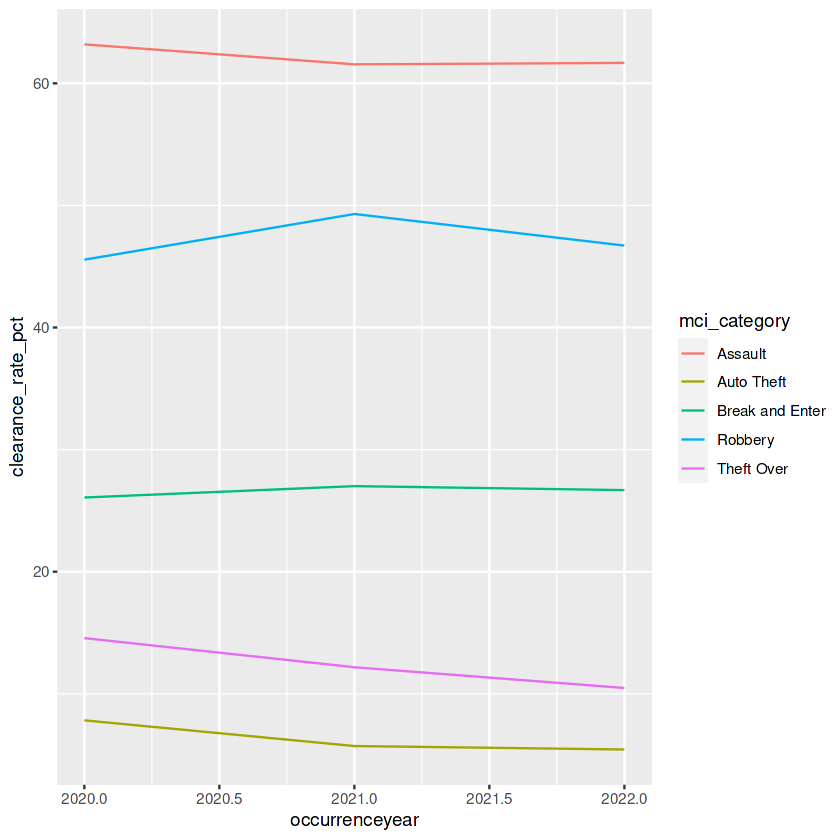

In [19]:
ggplot(clearance_rate) + geom_line(aes(x=occurrenceyear, y=clearance_rate_pct, group=mci_category, colour=mci_category))

It is evident that Auto Theft has a lowest clearance rate.

Let's plot Auto Theft by occurrence date

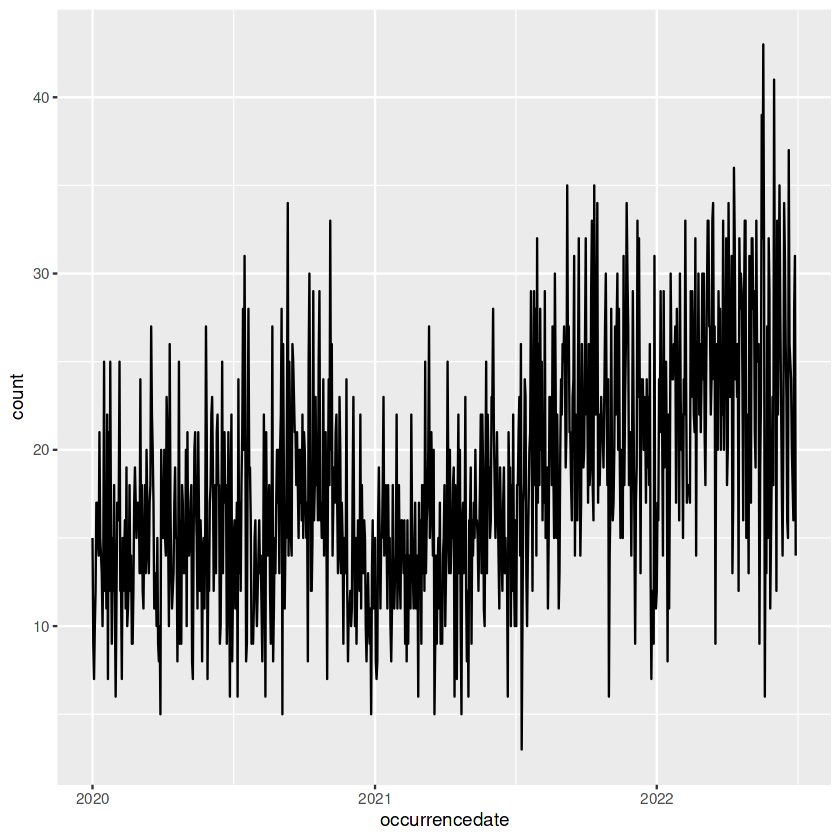

In [20]:
crime_data_2020_2022 %>% 
  filter(mci_category == "Auto Theft") %>% 
  ggplot() + geom_line(stat = "count", aes(x=occurrencedate))

The overall trend is that the number of auto thefts is increasing.

### Hourly MCI Activity

Let's plot occurrence hour by frequency. 

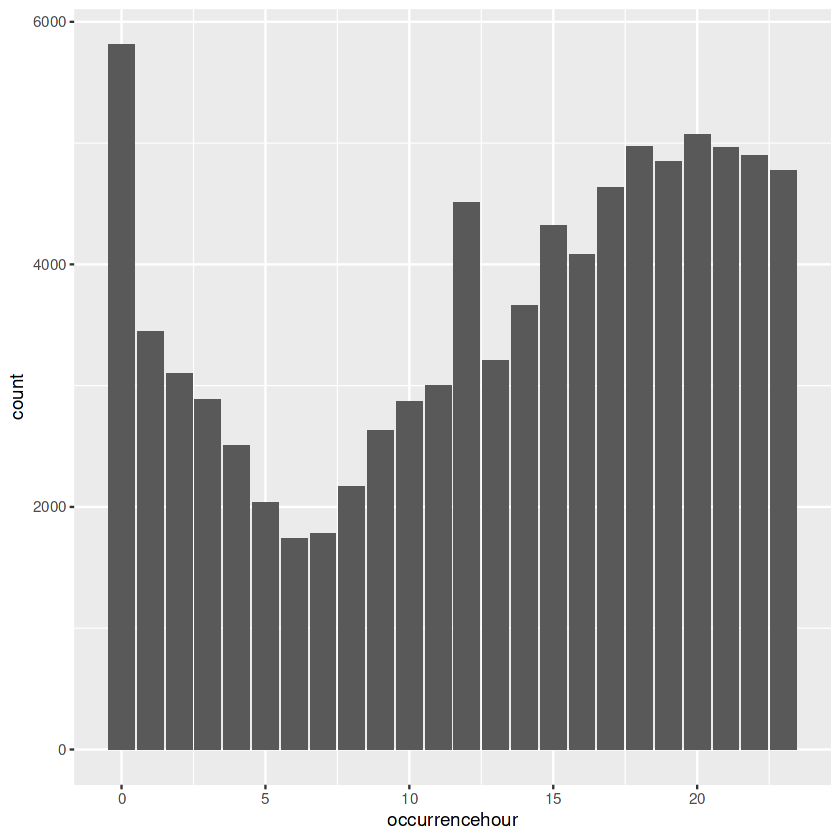

In [21]:
ggplot(crime_data_2020_2022) + geom_bar(aes(occurrencehour))

We can see that a significant amount of reported incidents occurred afternoon or during night. Let's see if this is true for all MCI categories. 

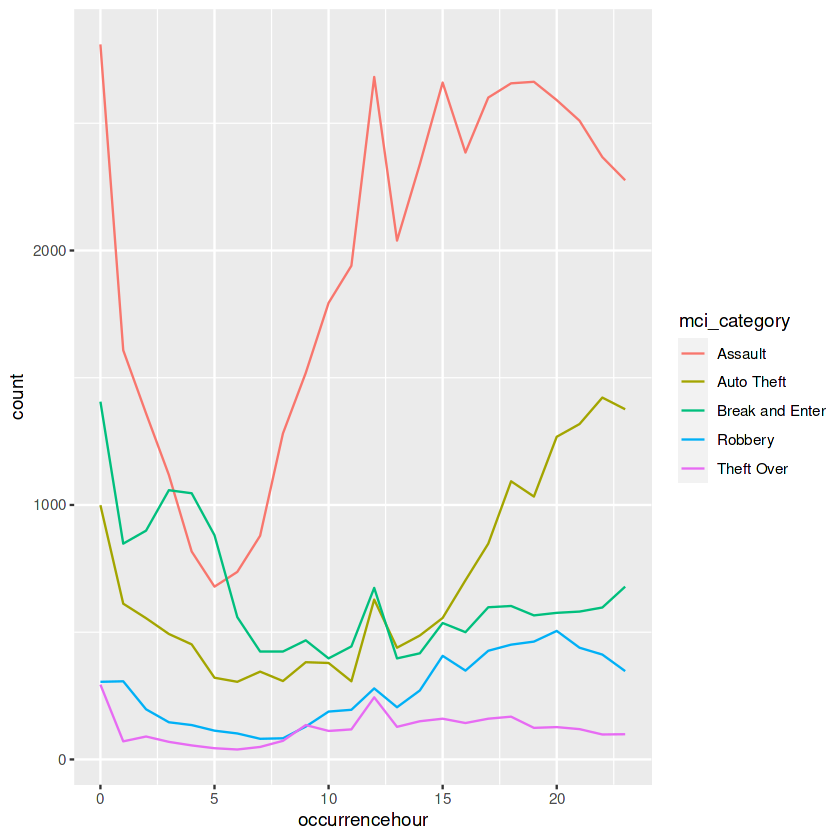

In [22]:
ggplot(crime_data_2020_2022) + geom_line(stat = 'count', aes(x=occurrencehour, group=mci_category, colour=mci_category))

It is evident that there is an increase of incidents in the afternoon and middle of the night. 

Let's determine the number of incidents that occurred between 1 PM (13th hour) and 12 AM (0th hours).

In [23]:
occurrenceyear <- c(2020,2021,2022)

for (val in occurrenceyear) {
  
  total_occurrences <- crime_data %>%
  filter(occurrenceyear==val) %>% 
  summarise(total_occurrences = n())
  
  occurrences_btwn_1PM_12AM <- crime_data_2020_2022 %>%
  filter(occurrenceyear==val) %>%  
  filter(occurrencehour >= 13 | occurrencehour == 0) %>% 
  summarise(btwn_1PM_12AM = n())

  occurrences_btwn_1PM_12AM_pct <- (occurrences_btwn_1PM_12AM/total_occurrences)*100

  occurrences_btwn_1AM_12PM <- crime_data_2020_2022 %>%
  filter(occurrenceyear==val) %>%  
  filter(occurrencehour >= 1 & occurrencehour <= 12) %>% 
  summarise(btwn_1PM_12AM = n())

  occurrences_btwn_1AM_12PM_pct <- (occurrences_btwn_1AM_12PM/total_occurrences)*100 

  MCI_hourly_activity <- data.frame(occurrences_btwn_1PM_12AM_pct,occurrences_btwn_1AM_12PM_pct,row.names = val)

  print(MCI_hourly_activity)
}

     btwn_1PM_12AM btwn_1PM_12AM.1
2020      63.00861        36.99139
     btwn_1PM_12AM btwn_1PM_12AM.1
2021      63.35444        36.64556
     btwn_1PM_12AM btwn_1PM_12AM.1
2022      61.55823        38.44177


Since 2020, a little over 61% of reported incidents occurred between 1 PM and 12 AM.

<a id="section-five"></a>
#### Recommendations

* **Insight**: Since 2020, a little over 61% of reported incidents occurred between 1 PM and 12 AM. The number of reported incidents peaks at 12 AM.
  + **Recommendations**: 
    - Allocate resources to increase the amount of police surveillance during the peak times.
    - Spread public awareness on how to prevent,identify and report crime.

* **Insight**: Auto Theft has the lowest clearance rate and Auto Theft incidents are on the rise. This November 2022 [Toronto CityNews Article](https://toronto.citynews.ca/2022/11/22/gta-car-thefts-insurance-police/), states that "auto thefts are a growing problem as its an easy crime to commit but 'a very difficult crime to solve.'" 
  + **Recommendations**: 
    - Partner with parking lot/garage operators and businesses to improve security systems and develop theft reduction strategies.
    - Use media to educate the public on preventative measures (ie. lock car doors, windows and steering wheel) and highlight which car types are most vulnerable. 
    - Allocate police resources to form task force focused on auto thefts.
    
* **Insight**: Assault has the highest reported incidents.
  + **Recommendations**:
    - Partner with hospitals: Specially trained police officers support patients with an assault-related injury with the goal of preventing future assault incidents. 
    - Partner with schools and community centers: Implement behavior intervention programs that targets youth
    
#### Appendix

Accident and emergency navigators. (2022, June 24). College of Policing. https://www.college.police.uk/research/crime-reduction-toolkit/accident-and-emergency-navigators 

CityNews. (2022, November 22). 
https://toronto.citynews.ca/2022/11/22/gta-car-thefts-insurance-police/

Crime Prevention. (n.d.). York Regional Police. https://www.yrp.ca/en/crime-prevention.asp Lopez, G. (2016, July 19). 

6 proven policies for reducing crime and violence without gun control. Vox. https://www.vox.com/2016/2/15/10981274/crime-violence-policies-guns 

Tool Guides | Partnering With Businesses to Address Public Safety. (2022, December 19). ASU Center for Problem-Oriented Policing. https://popcenter.asu.edu/content/tool-guides-partnering-businesses-address-public-safety-problems-page-4